# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1066.
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.69e-42
Time:                        10:02:05   Log-Likelihood:                 3.7288
No. Observations:                  50   AIC:                            0.5424
Df Residuals:                      46   BIC:                             8.190
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0665      0.080     63.485      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.6085411   5.07287255  5.4995273   5.86211907  6.14378427  6.33995261
  6.45909799  6.52134626  6.5551686   6.59270379  6.66447792  6.79438898
  6.99578056  7.26924947  7.60254775  7.97259491  8.34927006  8.70036061
  8.99685476  9.21770806  9.35330092  9.40701909  9.39469741  9.34201819
  9.28029165  9.24131175  9.25213258  9.33062336  9.48253267  9.7005439
  9.9654774  10.24944162 10.5204156  10.74750996 10.90604191 10.98159055
 10.97236623 10.88950454 10.75523678 10.59923743 10.45374869 10.34828322
 10.30477525 10.33397687 10.43369149 10.58913474 10.77536348 10.96137391
 11.11519539 11.20914314]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.21597678 11.09548883 10.86666619 10.57277761 10.27077998 10.01737331
  9.85511858  9.80201733  9.84710427  9.95313192]


## Plot comparison

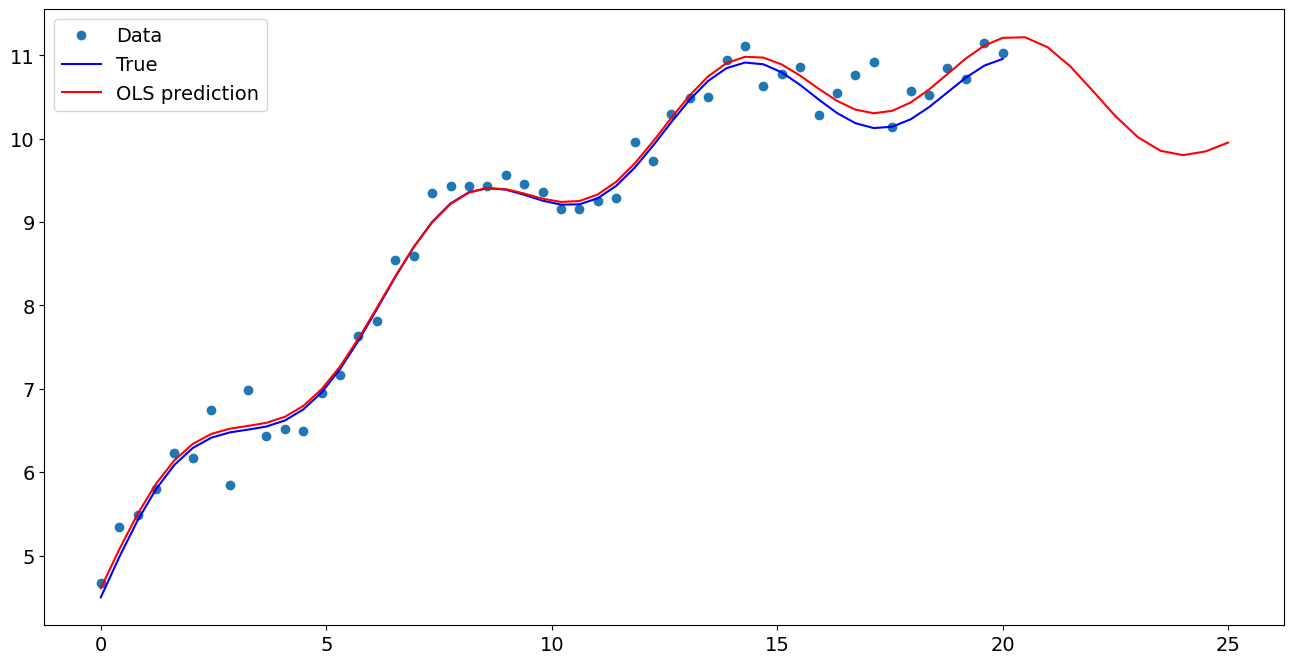

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.066455
x1                  0.491095
np.sin(x1)          0.484159
I((x1 - 5) ** 2)   -0.018317
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.215977
1    11.095489
2    10.866666
3    10.572778
4    10.270780
5    10.017373
6     9.855119
7     9.802017
8     9.847104
9     9.953132
dtype: float64